In [1]:
import os
import re
import numpy as np
import pandas as pd
#去除特殊字符
from bs4 import BeautifulSoup
#机器学习算法、数据预处理
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords

In [3]:
#用pandas读入数据
df = pd.read_csv('/Users/eamonyin/Downloads/迪哥nlp/练习/labeledTrainData.tsv', sep='\t',escapechar='\\')
print('Number of reviews:{}'.format(len(df)))
df.head()

Number of reviews:25000


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"""The Classic War of the Worlds"" by Timothy Hin..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
df['review'][1000]

"I watched this movie really late last night and usually if it's late then I'm pretty forgiving of movies. Although I tried, I just could not stand this movie at all, it kept getting worse and worse as the movie went on. Although I know it's suppose to be a comedy but I didn't find it very funny. It was also an especially unrealistic, and jaded portrayal of rural life. In case this is what any of you think country life is like, it's definitely not. I do have to agree that some of the guy cast members were cute, but the french guy was really fake. I do have to agree that it tried to have a good lesson in the story, but overall my recommendation is that no one over 8 watch it, it's just too annoying."

In [5]:
#去除html标签
example = BeautifulSoup(df['review'][1000],'html.parser').get_text()
example

"I watched this movie really late last night and usually if it's late then I'm pretty forgiving of movies. Although I tried, I just could not stand this movie at all, it kept getting worse and worse as the movie went on. Although I know it's suppose to be a comedy but I didn't find it very funny. It was also an especially unrealistic, and jaded portrayal of rural life. In case this is what any of you think country life is like, it's definitely not. I do have to agree that some of the guy cast members were cute, but the french guy was really fake. I do have to agree that it tried to have a good lesson in the story, but overall my recommendation is that no one over 8 watch it, it's just too annoying."

In [16]:
#去掉标点符号
example_letters = re.sub(r'[^a-zA-Z]', ' ', example)
example_letters

'I watched this movie really late last night and usually if it s late then I m pretty forgiving of movies  Although I tried  I just could not stand this movie at all  it kept getting worse and worse as the movie went on  Although I know it s suppose to be a comedy but I didn t find it very funny  It was also an especially unrealistic  and jaded portrayal of rural life  In case this is what any of you think country life is like  it s definitely not  I do have to agree that some of the guy cast members were cute  but the french guy was really fake  I do have to agree that it tried to have a good lesson in the story  but overall my recommendation is that no one over   watch it  it s just too annoying '

In [17]:
words = example_letters.lower().split()
words

['i',
 'watched',
 'this',
 'movie',
 'really',
 'late',
 'last',
 'night',
 'and',
 'usually',
 'if',
 'it',
 's',
 'late',
 'then',
 'i',
 'm',
 'pretty',
 'forgiving',
 'of',
 'movies',
 'although',
 'i',
 'tried',
 'i',
 'just',
 'could',
 'not',
 'stand',
 'this',
 'movie',
 'at',
 'all',
 'it',
 'kept',
 'getting',
 'worse',
 'and',
 'worse',
 'as',
 'the',
 'movie',
 'went',
 'on',
 'although',
 'i',
 'know',
 'it',
 's',
 'suppose',
 'to',
 'be',
 'a',
 'comedy',
 'but',
 'i',
 'didn',
 't',
 'find',
 'it',
 'very',
 'funny',
 'it',
 'was',
 'also',
 'an',
 'especially',
 'unrealistic',
 'and',
 'jaded',
 'portrayal',
 'of',
 'rural',
 'life',
 'in',
 'case',
 'this',
 'is',
 'what',
 'any',
 'of',
 'you',
 'think',
 'country',
 'life',
 'is',
 'like',
 'it',
 's',
 'definitely',
 'not',
 'i',
 'do',
 'have',
 'to',
 'agree',
 'that',
 'some',
 'of',
 'the',
 'guy',
 'cast',
 'members',
 'were',
 'cute',
 'but',
 'the',
 'french',
 'guy',
 'was',
 'really',
 'fake',
 'i',
 'do'

In [18]:
#去停用词
stopwords = stopwords.words('english')
words_nostop = [w for w in words if w not in stopwords]
words_nostop

['watched',
 'movie',
 'really',
 'late',
 'last',
 'night',
 'usually',
 'late',
 'pretty',
 'forgiving',
 'movies',
 'although',
 'tried',
 'could',
 'stand',
 'movie',
 'kept',
 'getting',
 'worse',
 'worse',
 'movie',
 'went',
 'although',
 'know',
 'suppose',
 'comedy',
 'find',
 'funny',
 'also',
 'especially',
 'unrealistic',
 'jaded',
 'portrayal',
 'rural',
 'life',
 'case',
 'think',
 'country',
 'life',
 'like',
 'definitely',
 'agree',
 'guy',
 'cast',
 'members',
 'cute',
 'french',
 'guy',
 'really',
 'fake',
 'agree',
 'tried',
 'good',
 'lesson',
 'story',
 'overall',
 'recommendation',
 'one',
 'watch',
 'annoying']

In [22]:
sentence = " ".join(words_nostop)
sentence

'watched movie really late last night usually late pretty forgiving movies although tried could stand movie kept getting worse worse movie went although know suppose comedy find funny also especially unrealistic jaded portrayal rural life case think country life like definitely agree guy cast members cute french guy really fake agree tried good lesson story overall recommendation one watch annoying'

In [26]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def clean_text(text):
    text = BeautifulSoup(text,'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in stopwords]
    return ' '.join(words) 

df['clean_review'] = df.review.apply(clean_text)
df.head()

/var/folders/n6/jc6p3y9s6j978jn_zhglfvzc0000gn/T/ipykernel_89185/2843679889.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text,'html.parser').get_text()


,id,sentiment,review,clean_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,"""The Classic War of the Worlds"" by Timothy Hin...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...


In [27]:
#抽取bag of words特征（用sklearn的CountVectorizer）
vectorizer = CountVectorizer(max_features=5000)#基于词频过滤
train_data_features = vectorizer.fit_transform(df.clean_review).toarray()
train_data_features.shape

(25000, 5000)

In [28]:
#数据切分（训练集 和 测试集）
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data_features,df.sentiment,test_size=0.2,random_state=0)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    此函数用于绘制混淆矩阵

    参数:
    cm (numpy.ndarray): 混淆矩阵
    classes (list): 类别标签列表
    normalize (bool): 是否将混淆矩阵归一化，默认为 False
    title (str): 图像的标题，默认为 'Confusion matrix'
    cmap (matplotlib.colors.Colormap): 用于绘制的颜色映射，默认为 plt.cm.Blues
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/miniconda3/envs/deepshare/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall metric in the testing dataset:  0.8597063621533442
accuracy metric in the testing dataset:  0.8582


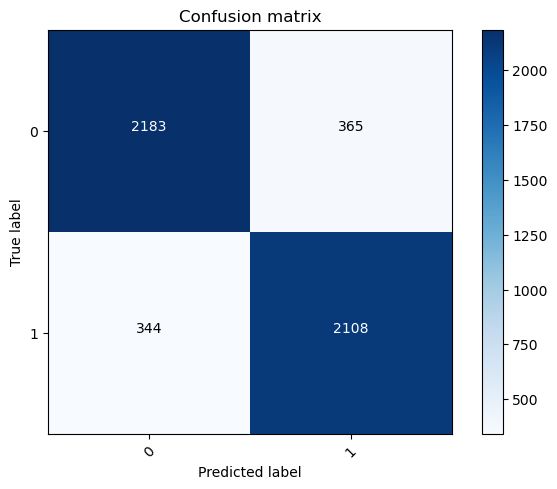

In [30]:
# 创建逻辑回归模型
LR_model = LogisticRegression()
# 训练模型
LR_model = LR_model.fit(X_train, y_train)
# 预测
y_pred = LR_model.predict(X_test)
# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test, y_pred)

# 计算召回率
print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
#计算准确率
print("accuracy metric in the testing dataset: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[0, 0] + cnf_matrix[1, 1] + cnf_matrix[0, 1] + cnf_matrix[1, 0]))


# 绘制非归一化混淆矩阵
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [32]:
#用pandas读入数据
df = pd.read_csv('/Users/eamonyin/Downloads/迪哥nlp/练习/unlabeledTrainData.tsv', sep='\t',escapechar='\\')
print('Number of reviews:{}'.format(len(df)))
df.head()

Number of reviews:50000


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."


In [33]:
df['clean_review'] = df.review.apply(clean_text)
df.head()

/var/folders/n6/jc6p3y9s6j978jn_zhglfvzc0000gn/T/ipykernel_89185/2843679889.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text,'html.parser').get_text()


,id,review,clean_review
0,9999_0,"Watching Time Chasers, it obvious that it was ...",watching time chasers obvious made bunch frien...
1,45057_0,I saw this film about 20 years ago and remembe...,saw film years ago remember particularly nasty...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba...",minor spoilersin new york joan barnard elvire ...
3,7161_0,I went to see this film with a great deal of e...,went see film great deal excitement school dir...
4,43971_0,"Yes, I agree with everyone on this site this m...",yes agree everyone site movie bad even call mo...


In [34]:
review_part = df['clean_review']
review_part.shape

(50000,)

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/eamonyin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
import warnings
warnings.filterwarnings ("ignore")

def split_sentences(review):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')#英文分词报错需要安装nltk.download('punkt')
    #分词
    raw_sentences = tokenizer.tokenize(review.strip())
    #清洗
    sentences = [clean_text(s) for s in raw_sentences if s]
    return sentences
sentences = sum(review_part.apply(split_sentences), [])
print('{} reviews -> {} sentences'.format(len(review_part), len(sentences)))

50000 reviews -> 50000 sentences


In [43]:
sentences[0]

'watching time chasers obvious made bunch friends maybe sitting around one day film school said hey let pool money together make really bad movie something like ever said still ended making really bad movie dull story bad script lame acting poor cinematography bottom barrel stock music etc corners cut except one would prevented film release life like'

In [40]:
sentences_list = []
for line in sentences:
    sentences_list.append(nltk.word_tokenize(line))

In [ ]:
#设定向量训练参数
num_features = 300 # 特征维度300维
min_word_count = 40 # 最少出现40次的词（词频）
num_workers = 4 # 参数控制训练的并行数
context = 10
# 指定模型名字
model_name = '{}feature_{}minword_{}context.model'.format(num_features, min_word_count,context)

#构建模型
from gensim.models.word2vec import  Word2Vec
model = Word2Vec(sentences_list, workers=num_workers ,vector_size=num_features,min_count=min_word_count,window=context)

model.wv.init_sims(replace=True)
#保存模型（保存到..上一级目录下Gemsim练习文件夹中）
model.wv.save(os.path.join('..','Gemsim练习',model_name))

In [46]:
print(model.wv.doesnt_match(['man','woman','child','kitchen']))

kitchen


In [47]:
model.wv.most_similar('boy')

[('girl', 0.7353582382202148),
 ('kid', 0.6208159923553467),
 ('teenager', 0.6175847053527832),
 ('orphan', 0.6021819114685059),
 ('lad', 0.5700315237045288),
 ('brat', 0.5527265667915344),
 ('grandmother', 0.5378683805465698),
 ('dad', 0.5287836790084839),
 ('sister', 0.5114626288414001),
 ('angus', 0.5077499747276306)]

In [49]:
df = pd.read_csv('/Users/eamonyin/Downloads/迪哥nlp/练习/labeledTrainData.tsv',sep='\t',escapechar='\\')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"""The Classic War of the Worlds"" by Timothy Hin..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [56]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

def clean_text(text, remove_stopwords=False):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    if remove_stopwords:
        words = [w for w in words if w not in eng_stopwords]
    return words


def to_review_vector(review):
    global word_vec
    review = clean_text(review, remove_stopwords=True)
    word_vec = np.zeros((1, 300))
    for word in review:
        # word_vec = np.zeros((1, 300))
        if word in model.wv.key_to_index:
             word_vec += np.array([model.wv[word]]) # model.wv[word]获得词向量
    return pd.Series(word_vec.mean(axis = 0)) # word_vec.mean计算整句话平均向量值

train_data_features = df.review.apply(to_review_vector)
train_data_features.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.119880,-2.065376,-2.379948,1.787148,-2.297413,1.456754,-1.048682,-1.305244,-1.957105,2.362460,...,1.249704,-1.219402,2.621868,1.244599,4.252781,5.519925,-1.716134,1.257972,1.943958,-2.267424
1,1.024400,1.734033,-0.393997,0.355636,-0.989784,0.911478,0.445839,-2.555175,-1.539520,0.977977,...,0.463812,0.511858,0.952929,-0.813730,3.054030,0.738909,-0.076476,0.864605,0.851661,-2.691619
2,1.857037,3.455379,-1.939125,0.452569,0.328551,-5.684084,1.889937,5.295589,6.078263,-2.086571,...,-0.546285,1.471410,0.712211,0.860802,-0.582224,4.473636,-0.150426,-1.909253,-0.158911,4.151898
3,0.265719,2.098823,-0.568527,1.840265,0.736556,0.761174,-2.243618,-1.716168,-0.456248,-1.960015,...,1.365852,1.326883,1.975418,-1.354237,1.304455,2.465221,0.459522,1.392626,1.146901,-0.544497
4,0.343023,2.233894,-1.537942,1.145865,-0.180315,-2.963826,0.384539,4.944383,0.572286,-2.445902,...,0.476324,-0.962219,0.470524,1.711158,-0.547667,3.506202,0.625747,-1.408448,-2.133726,2.852950


Recall metric in the testing dataset:  0.882137030995106
accuracy metric in the testing dataset:  0.8768


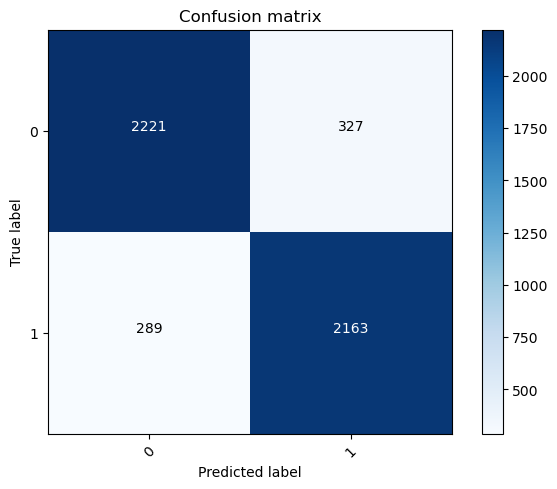

In [57]:
#数据切分（训练集 和 测试集）
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data_features,df.sentiment,test_size=0.2,random_state=0)

# 创建逻辑回归模型
LR_model = LogisticRegression()
# 训练模型
LR_model = LR_model.fit(X_train, y_train)
# 预测
y_pred = LR_model.predict(X_test)
# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test, y_pred)

# 计算召回率
print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
#计算准确率
print("accuracy metric in the testing dataset: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[0, 0] + cnf_matrix[1, 1] + cnf_matrix[0, 1] + cnf_matrix[1, 0]))


# 绘制非归一化混淆矩阵
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()